In [2]:
import torch
import scipy.io as sio
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
device

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

we should handle nan values ?????!!!

In [67]:
def random_plot_velocity_fields(train_dir, label_dir):
    rand_ind = np.random.randint(len(os.listdir(train_dir)))
    rand_mat = train_dir + sorted(os.listdir(train_dir))[rand_ind]
    label_rand = label_dir + sorted(os.listdir(label_dir))[rand_ind]
    print(rand_mat)
    print(label_rand)
    label_img = mpimg.imread(label_rand)
    x = sio.loadmat(rand_mat)["vxSample"]
    y = sio.loadmat(rand_mat)["vySample"]
    img = np.stack((x,y, np.zeros(x.shape)), -1)
    # x = np.logical_not(np.isnan(x))
    # y = np.logical_not(np.isnan(y))
    #print(x)
    u = x/np.sqrt(x**2 + y**2)
    #u = np.nan_to_num(u)
    #print(u)
    #u = u[np.logical_not(np.isnan(u))]
    #print(u)
    v = y/np.sqrt(x**2 + y**2)
    #v = v[np.logical_not(np.isnan(v))]
    #v = np.nan_to_num(v)
    fig = plt.figure(dpi=500)
    ax = fig.add_subplot(111)
    ax.quiver(x, y, u, v)
    print(v.shape)
    print(u.shape)
    print(x.shape)
    original_img = np.stack((u, v, np.zeros(x.shape)), -1)
    fig = plt.figure(figsize=(30, 20), dpi=200)
    rows = 2
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(original_img)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(label_img)


In [4]:
train_dir = "../dataset_eddy/data4test/data/"
label_dir = "../dataset_eddy/data4test/label/"

/tmp/ipykernel_484807/3481825566.py:14: RuntimeWarning: invalid value encountered in divide
  u = x/np.sqrt(x**2 + y**2)
/tmp/ipykernel_484807/3481825566.py:19: RuntimeWarning: invalid value encountered in divide
  v = y/np.sqrt(x**2 + y**2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../dataset_eddy/data4test/data/6_15_151_1.mat
../dataset_eddy/data4test/label/6_15_151_1.png
(256, 256)
(256, 256)
(256, 256)


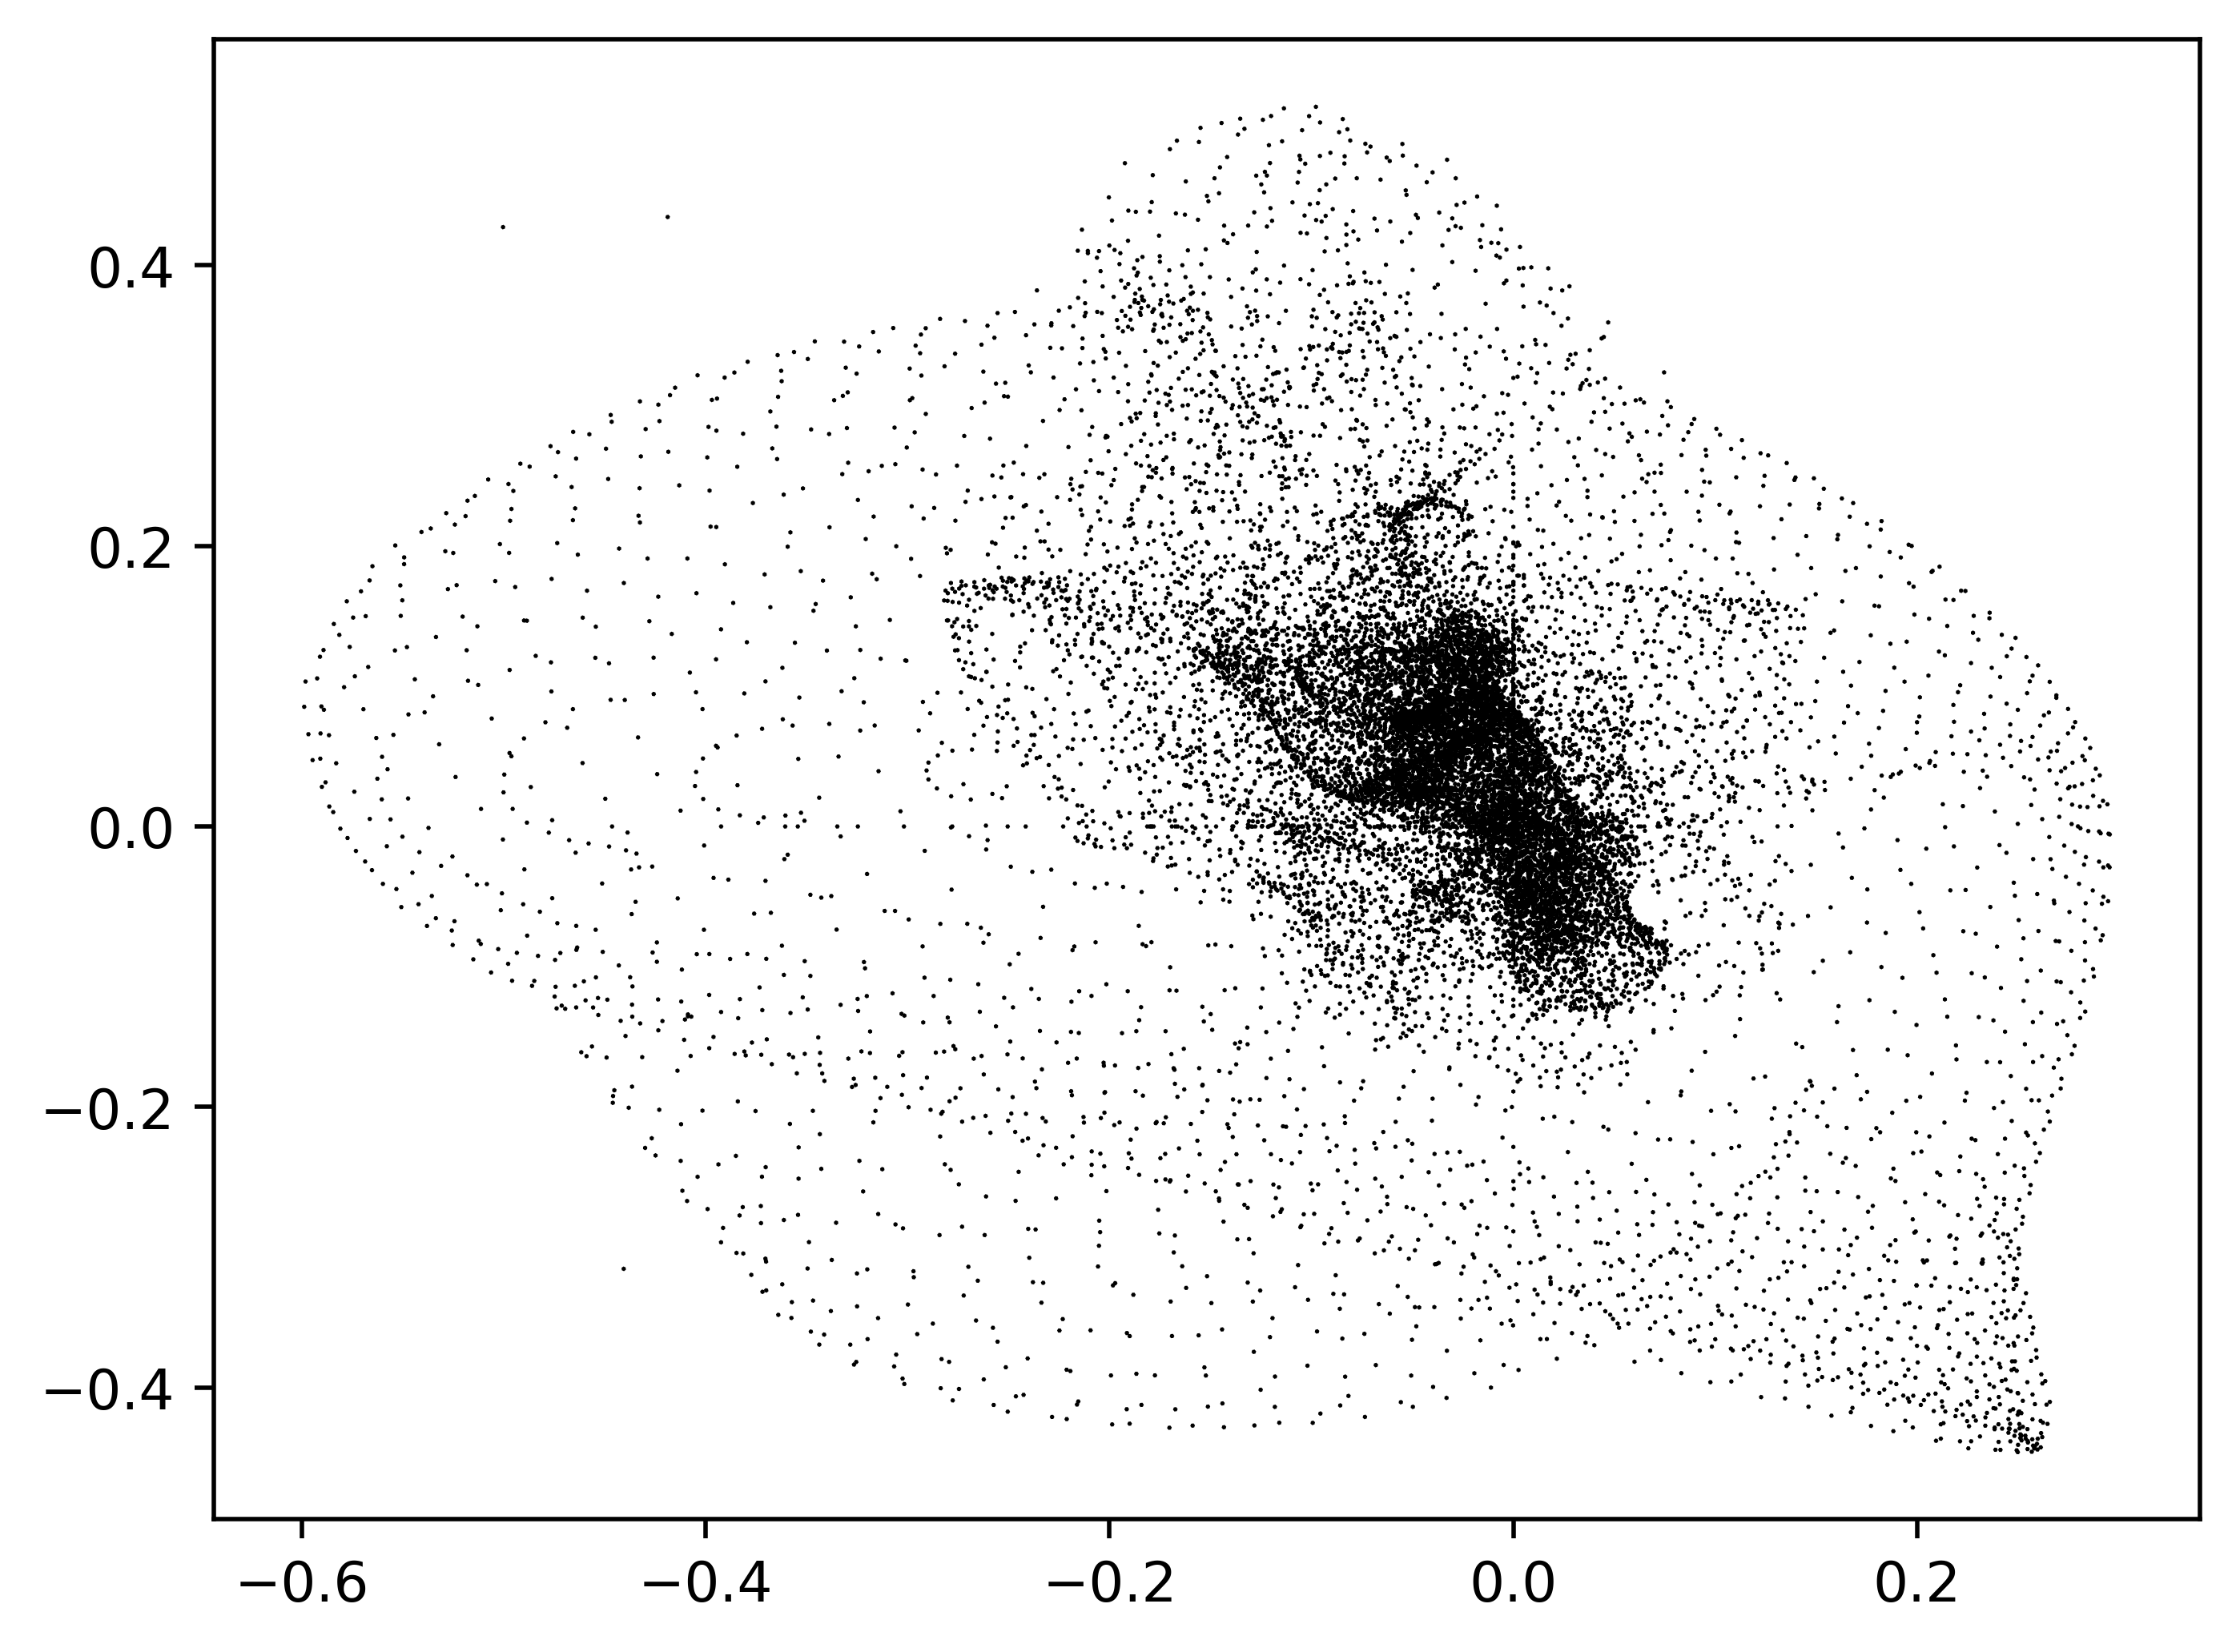

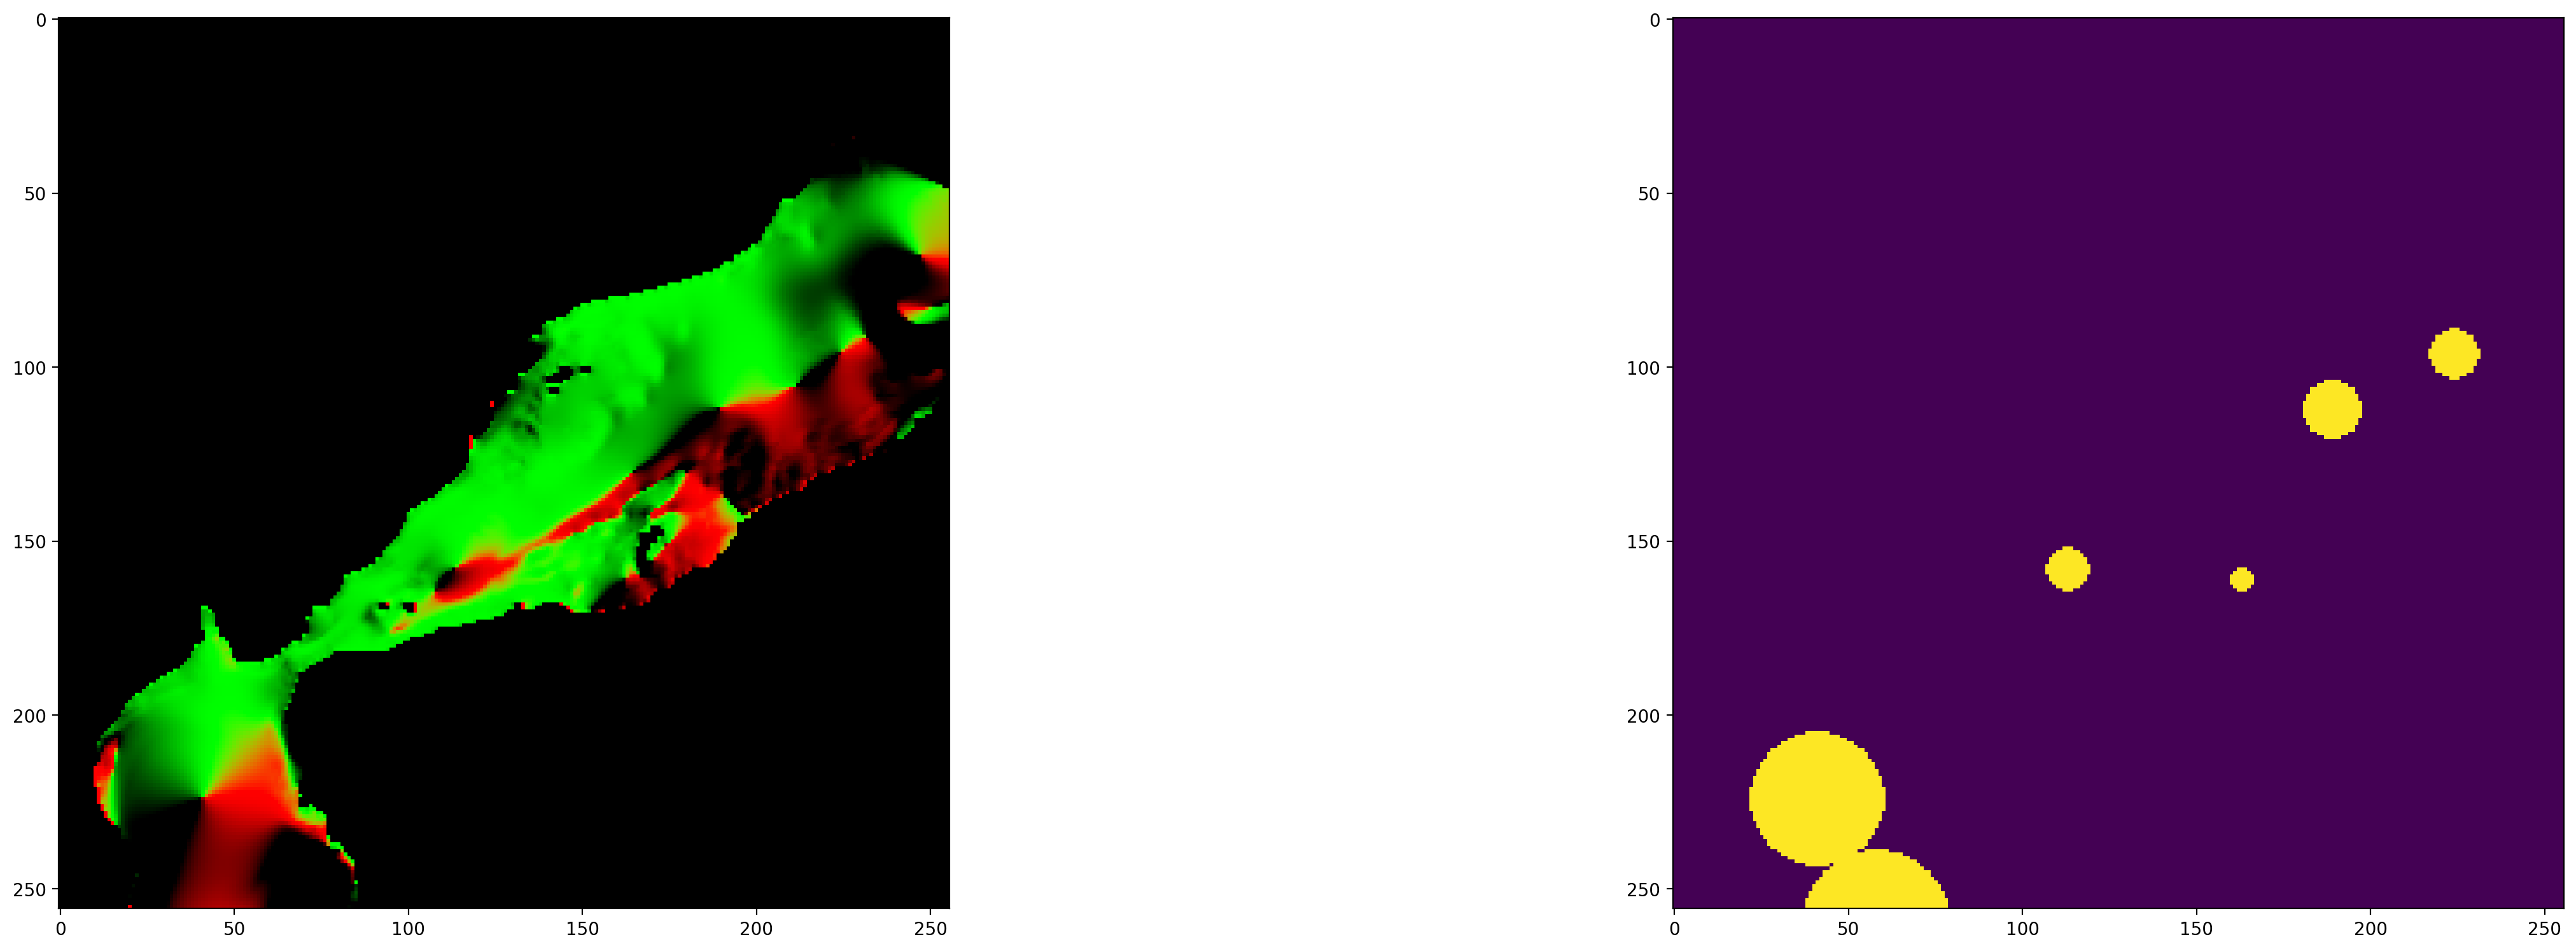

In [68]:
random_plot_velocity_fields(train_dir=train_dir, label_dir=label_dir)

In [31]:
256**2

65536